# Exercise 1

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline.
Twitter data was scraped from February of 2015 and contributors were
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

*El conjunto de datos proporcionado contiene un total de 14,640 tweets. De este total, el 62% está etiquetado con un sentimiento negativo, seguido por un 21% con etiqueta neutral y el 16% restante presenta una etiqueta positiva.*

In [ ]:
tweets['airline_sentiment'].value_counts()

,count
airline_sentiment,
negative,9178
neutral,3099
positive,2363


### Proportion of tweets per airline


*United Airlines es la aerolínea con la mayor cantidad de menciones, con 3,822 tweets, lo que representa el 26% del total de registros, mientars que Virgin America tiene la menor cantidad de menciones, con solo 504 tweets.*

In [ ]:
tweets['airline'].value_counts()

,count
airline,
United,3822
US Airways,2913
American,2759
Southwest,2420
Delta,2222
Virgin America,504


<Axes: xlabel='airline'>

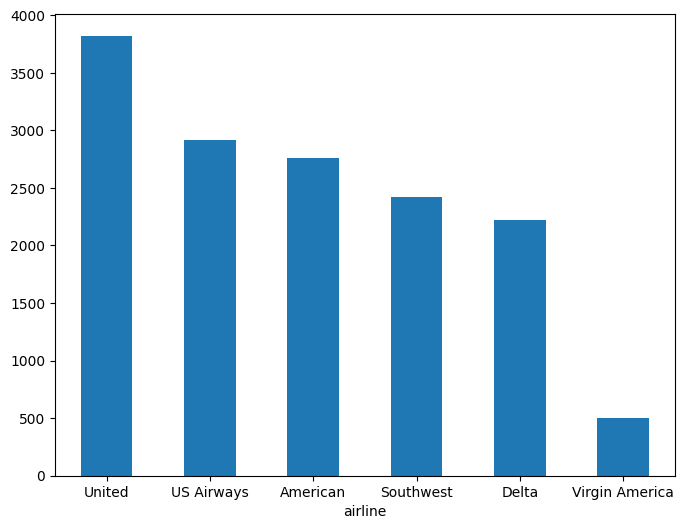

In [ ]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

*Consistente con la proporción de registros analizados, United es la aerolínea que presenta la mayor cantidad de tweets con categoría negativa. Además, ninguna de las aerolíneas muestra una cantidad de tweets etiquetados como positivos que supere a los negativos.*

<Axes: title={'center': 'Sentiment by airline'}, xlabel='airline'>

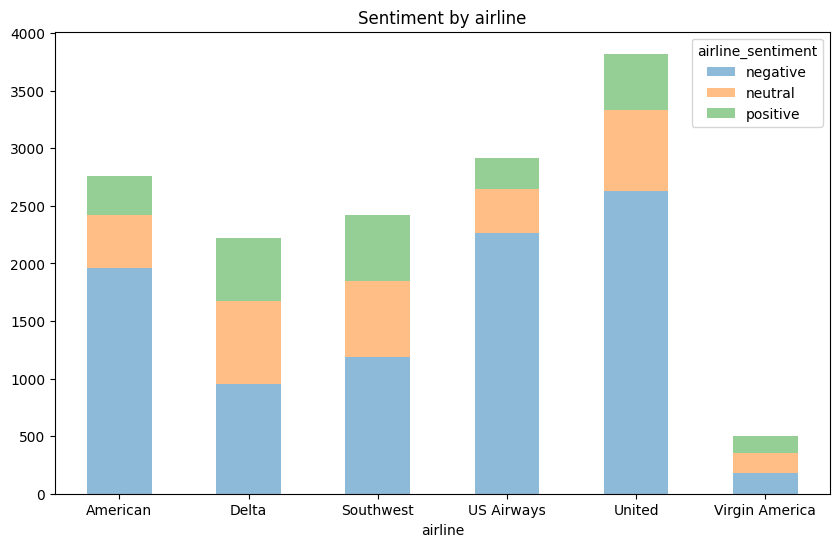

In [ ]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# **Exercise 1.1**
Predict the sentiment using CountVectorizer

use Random Forest classifier

In [52]:
tweets = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/Tweets.zip', index_col=0)

In [53]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [54]:
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [9]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7748178506375227

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.78      0.96      0.86      2814
     neutral       0.69      0.41      0.51       884
    positive       0.86      0.48      0.61       694

    accuracy                           0.77      4392
   macro avg       0.78      0.62      0.66      4392
weighted avg       0.77      0.77      0.75      4392



# **Exercise 1.2**
Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [56]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [11]:
vect = CountVectorizer(stop_words='english')
X_dtm = vect.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [13]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7661657559198543

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.83      0.89      0.86      2814
     neutral       0.57      0.51      0.54       884
    positive       0.72      0.60      0.65       694

    accuracy                           0.77      4392
   macro avg       0.71      0.67      0.68      4392
weighted avg       0.76      0.77      0.76      4392



# **Exercise 1.3**
Increase n_grams size (with and without stopwords), then predict the sentiment using CountVectorizer

use Random Forest classifier

**n_grams 1-2 without stopwords**

In [ ]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [15]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english')
X_dtm = vect.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [17]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7638888888888888

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.81      0.90      0.86      2814
     neutral       0.57      0.46      0.51       884
    positive       0.74      0.59      0.66       694

    accuracy                           0.76      4392
   macro avg       0.71      0.65      0.67      4392
weighted avg       0.75      0.76      0.75      4392



**n_grams 1-4 without stopwords**

In [24]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [28]:
vect = CountVectorizer(ngram_range=(1, 4), stop_words='english')
X_dtm = vect.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [27]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7616120218579235

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.81      0.91      0.85      2814
     neutral       0.57      0.46      0.51       884
    positive       0.75      0.56      0.64       694

    accuracy                           0.76      4392
   macro avg       0.71      0.64      0.67      4392
weighted avg       0.75      0.76      0.75      4392



**n_grams 1-2 with stopwords**

In [30]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [31]:
vect = CountVectorizer(ngram_range=(1, 2))
X_dtm = vect.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [33]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7700364298724954

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.77      0.97      0.86      2814
     neutral       0.69      0.38      0.49       884
    positive       0.84      0.47      0.61       694

    accuracy                           0.77      4392
   macro avg       0.77      0.61      0.65      4392
weighted avg       0.77      0.77      0.74      4392



**n_grams 1-4 with stopwords**

In [35]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [36]:
vect = CountVectorizer(ngram_range=(1, 4))
X_dtm = vect.fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.3, random_state=42)

In [38]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
from sklearn.metrics import classification_report, accuracy_score
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7572859744990893

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.76      0.97      0.85      2814
     neutral       0.69      0.36      0.47       884
    positive       0.88      0.40      0.55       694

    accuracy                           0.76      4392
   macro avg       0.77      0.58      0.62      4392
weighted avg       0.76      0.76      0.73      4392



# **Exercise 1.4**

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [40]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [41]:
vect = TfidfVectorizer(stop_words='english', max_features=3000)
X_tfidf = vect.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [43]:
# Paso 3: Entrenar el modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred = clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive'])

print("Precisión del Modelo:", accuracy)
print("\nInforme de Clasificación:")
print(report)

Precisión del Modelo: 0.7579690346083788

Informe de Clasificación:
              precision    recall  f1-score   support

    negative       0.79      0.93      0.85      2814
     neutral       0.59      0.37      0.45       884
    positive       0.74      0.57      0.65       694

    accuracy                           0.76      4392
   macro avg       0.71      0.62      0.65      4392
weighted avg       0.74      0.76      0.74      4392



In [47]:
# Obtener la importancia de las palabras
feature_names = vect.get_feature_names_out()
importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({'word': feature_names, 'importance': importances})
# Ordenar las palabras por su importancia
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df.head(20))


               word  importance
2681         thanks    0.035802
2678          thank    0.033964
1550        jetblue    0.020593
2513   southwestair    0.017213
2835      usairways    0.015768
2811         united    0.015529
239     americanair    0.014413
1325          great    0.014085
1442           http    0.012976
1191         flight    0.010945
2863  virginamerica    0.009534
1703           love    0.007416
1436          hours    0.007063
338         awesome    0.006435
501       cancelled    0.005766
935              dm    0.005609
1412           hold    0.005582
236         amazing    0.005371
838         delayed    0.005226
1568           just    0.005178


In [50]:
results_df = pd.DataFrame({'true_sentiment': y_test, 'predicted_sentiment': y_pred, 'text': X_test})
results_df['true_sentiment'] = results_df['true_sentiment'].map({-1: 'negative', 0: 'neutral', 1: 'positive'})
results_df['predicted_sentiment'] = results_df['predicted_sentiment'].map({-1: 'negative', 0: 'neutral', 1: 'positive'})

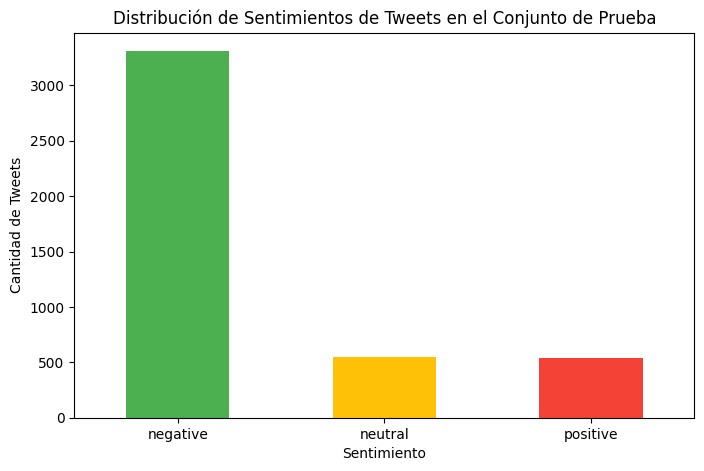

In [51]:
# Contar la cantidad de cada tipo de sentimiento en el conjunto de prueba
sentiment_counts = results_df['predicted_sentiment'].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#F44336'])
plt.title('Distribución de Sentimientos de Tweets en el Conjunto de Prueba')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.xticks(rotation=0)
plt.show()


# **Conclusión del ejercicio**

Tras aplicar 4 distintas técnicas de procesamiento de texto, se identificó que aquella con la que se obtenía la precisión más alta (0.7748) fue aquella en la que únicamente se aplicó vectorización. Este resultado puede ser consistente con el hecho de que algunos modelos, como los basados en árboles de decisión, pueden funcionar bien con la simplicidad de la vectorización básica, ya que están diseñados para manejar grandes cantidades de características dispersas. Sin embargo, para mejorar este desempeño, podría explorarse la combinación de varias técnicas de procesamiento o realizar una optimización del modelo.

Ahora bien, tras aplicar estas diferentes técnicas, se identificó que en 4 de los 7 intentos realizados, la mayor precisión se obtuvo en la clasificación de la etiqueta negativa. Esto podría estar relacionado con el desbalance de los datos hacia esta etiqueta. Sin embargo, es importante destacar que la clase positiva no muestra un comportamiento rezagado, lo cual puede estar asociado a los resultados del análisis de importancia de palabras mediante TF-IDF, donde se identificó que las tres palabras más relevantes están vinculadas a términos positivos, como se explica a continuación:

Se identificaron términos clave que son muy indicativos del sentimiento expresado. Por ejemplo, entre las palabras más destacadas se encuentran "thanks", "thank", "great", "love", "awesome" y "amazing", que sugieren interacciones positivas. De igual manera, se identificaron algunos términos asociados a experiencias negativas, como "delayed", "cancelled", "hold" y "dm" (mensaje directo, posiblemente relacionado con problemas).